# Programmation d'un neurone artificiel

Neuronne artificiel permettant de résoudre des problèmes linéaires

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Fonction d'initialisation 
<br />
<div>
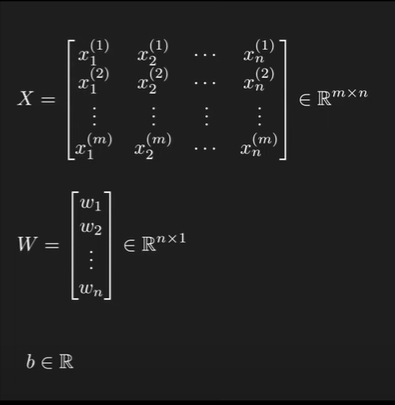
</div>

In [2]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

## Fonction du modèle

<div>
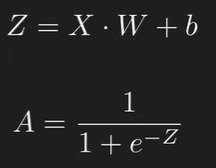
</div>

In [3]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/ (1 + np.exp(-Z))
    return A

## Fonction coût

NB: Dans notre fonction log_loss, on rajouter un terme en epsilon très faible, afin d'être sur de ne jamais à avoir à calculer log(0).

In [26]:
def log_loss(A,y):
    epsilon = 1e-15
    return -1/len(y) * np.sum(y*np.log(A + epsilon) + (1-y)*np.log(1-A + epsilon))

## Fonction gradient

In [5]:
def gradients(A, X, y):
    dW = 1/len(y) *  np.dot(X.T, A-y)
    db = 1/len(y) * np.sum(A-y)
    return (dW, db)

## Fonction de mise à jour 

In [6]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

## Fonction de prédiction

In [7]:
def predict(X, W, b):
    A = model(X,W,b)
    return (A >=0.5, A)

## Assemblage final

Assemblage de toutes les fonctions afin de créer un neurone artificiel 

In [53]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter=100):
    
    #initialisation W, b
    W,b = initialisation(X)
    
    Loss = []
    acc = []
    
    for i in tqdm(range(n_iter)): #tqdm est l'affichage d'une barre de progression
        
        # activations
        A = model(X, W, b)
        
        if i%10 == 0: #permet d'éviter que le code ne mette trop longtemps à s'éxécuter si jamais n_iter est très grand
            # calcul du coût
            Loss.append(log_loss(A,y))

            # calcul de l'accuracy
            y_pred,_ = predict(X,W,b)
            acc.append(accuracy_score(y,y_pred))
        
        # mise à jour
        dW, db = gradients(A,X,y)
        W,b = update(dW, db, W, b, learning_rate)
        
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Loss)
    plt.title('Evolution de l\'erreur')
    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.title('Evolution de la précision')
    plt.show()
    
    return (W, b)

# Mise en situation

On souhaite déterminer grâce à ce neurone si une plante est toxique ou non en fonction de la longueur et de la largeur de ses feuilles (2 variables).
On dit que si la plante est toxique: y=1, sinon y=0.

Pour générer un modèle, l'on va générer aléatoirement un dataset de 100 données

## Génération d'un dataset 
On génère un dataset aléatoire grace à la fonction make_blobs de sckikitLearn

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers = 2, random_state=0)
y = y.reshape((y.shape[0],1))

### Affichage du dataset généré

dimensions de X: (100, 2)
dimensions de y: (100, 1)


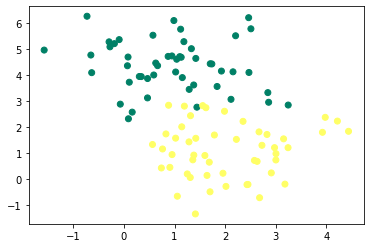

In [10]:
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()


## Entrainement du neuronne sur ces données

100%|██████████| 100/100 [00:00<00:00, 12529.29it/s]


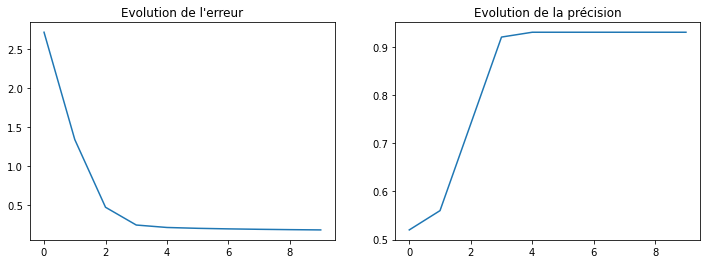

W= [[ 0.75226726]
 [-1.30852658]]
b=  [2.09865899]


In [51]:
W, b = artificial_neuron(X,y)
print('W=', W)
print('b= ', b)

## Effectuer des prédictions

L'on utilise la fonction signoide pour déterminer si la plante est toxique ou non, si la probabilité est supérieure à 0.5, on peut dire que la plante est toxique.

On récolte une nouvelle plante inconnue de paramètres (2,1), et l'on souhaite savoir si elle est toxique

In [12]:
new_plant = np.array([2,1])
decision, p = predict(new_plant, W, b)

if(decision):
    print('La plante est toxique avec une probabilté de', (p[0]*10000)//10/10, '%')
else:
    print('La plante n\'est pas toxique avec une probabilté de', ((1- p[0])*10000)//10/10, '%')

La plante est toxique avec une probabilté de 88.4 %


## Tracer la fontière de prédiction

La frontière est la droite d'équation z(x1,x2)=0 <=> w1*x1 + w2*x2 +b = 0 <=> x2 = -w1*x1 - b / w2

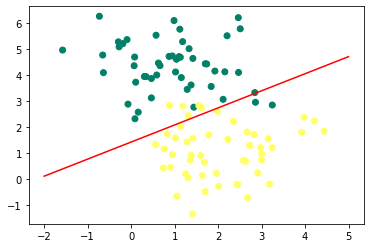

In [13]:
x1 = np.linspace(-2,5,100)
x2 = (-W[0]*x1 - b)/W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.plot(x1,x2, c='r')
plt.show()



# Application - Chat vs Chien

In [14]:
from utilities import *

### Chargement du dataset


Le dataset contient :
- 1000 photos (500 chiens et 500 chats) de 64x64 pixels et 1000 étiquettes (chien ou chat) pour le train set
<br />
- 200 photos (100 chiens et 100 chats) de 64x64 pixels et 200 étiquettes (chien ou chat) pour le test set
<br />

<p>   
Les images sont codés sur 8 bits, soit 255 valeurs
<br />
0 --> Chat <br />1 --> Chien
<p>

In [23]:
X_train, y_train, X_test, y_test = load_data()

On affiche les 10 premières photos de ce dataset

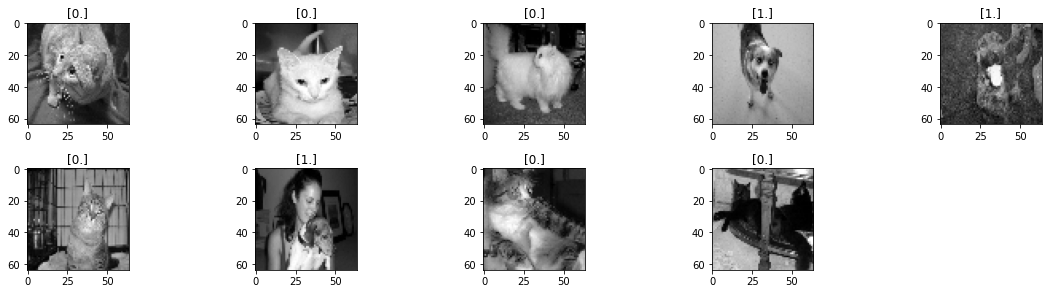

In [24]:
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

Dans ce cas là, comme nous travaillons sur des photos de 64x64 pixels, nous avons donc 64x64=4096 variables. 

## 1ère étape : Reshape des données et normalisation

Dans cette aprtie, l'on va "applatir" les photos sur un seul axe afin de pouvoir travailler dessus et, effectuer en même temps une normalisation MinMax afin de mettre la valeur de nos pixels sur une échelle de 0 à 1

In [27]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1)/X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0],-1)/X_train.max()

## 2ème étape : Réglage des hyperparamètres
Si l'on lance un apprentissage dans l'état actuel on obtient

100%|██████████| 100/100 [00:00<00:00, 320.34it/s]


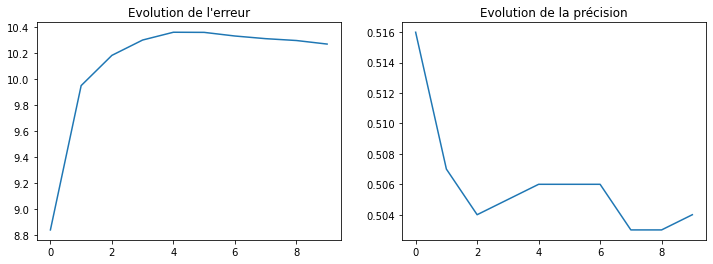

In [64]:
W, b = artificial_neuron(X_train_reshape, y_train)

L'on remarque que le résultat n'est pas du tout satisfaisant.
<br />
L'on va donc régler les hyperparamètres de notre neurone artificiel afin d'avoir un résultat satisfaisant

On va prendre dans ce cas un learning_rate de 0.01 et un n_iter de 10 000

100%|██████████| 10000/10000 [00:31<00:00, 318.35it/s]


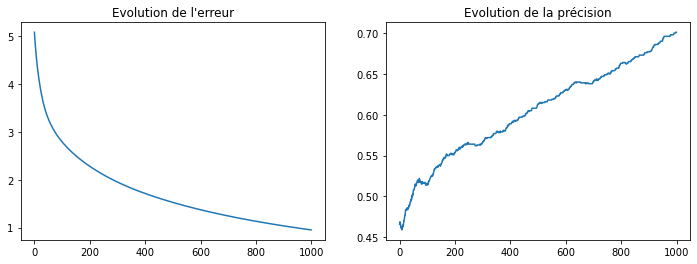

In [54]:
W, b = artificial_neuron(X_train_reshape, y_train, learning_rate=0.01, n_iter=10000)

Afin de vérifier l'efficacité de notre apprentissage, l'on va refaire une fonction artificial_neuron qui affiche également l'erreur et la précsion sur les données de tests

In [73]:
def artificial_neuron2(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter=100):
    
    #initialisation W, b
    W,b = initialisation(X_train)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(n_iter)): #tqdm est l'affichage d'une barre de progression
        
        # activations
        A= model(X_train, W, b)
        
        if i%10 == 0: #permet d'éviter que le code ne mette trop longtemps à s'éxécuter si jamais n_iter est très grand
            # train
            train_loss.append(log_loss(A,y_train))
            y_pred,_ = predict(X_train,W,b)
            train_acc.append(accuracy_score(y_train,y_pred))

            # test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test,y_test))
            y_pred,_ = predict(X_test,W,b)
            test_acc.append(accuracy_score(y_test,y_pred))
        
        # mise à jour
        dW, db = gradients(A,X_train,y_train)
        W,b = update(dW, db, W, b, learning_rate)
        
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.title('Evolution de l\'erreur')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.title('Evolution de la précision')
    plt.legend()
    plt.show()
    
    return (W, b)

On execute avec la nouvelle fonction

100%|██████████| 10000/10000 [00:37<00:00, 268.14it/s]


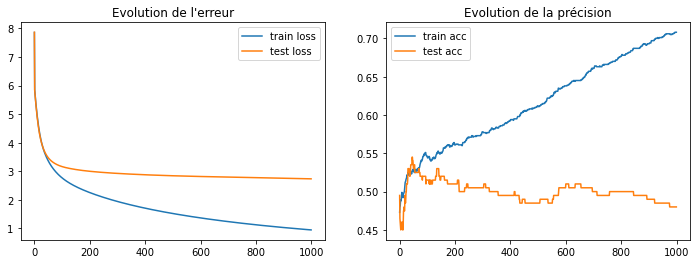

In [74]:
W, b =artificial_neuron2(X_train_reshape,y_train,X_test_reshape,y_test,learning_rate=0.01, n_iter=10000)

L'on remarque que l'erreur pour les tests commence à devnir constante et que la précision diminue; les limites de ce systèmes sont atteintes, nous en sommes en over-fitting